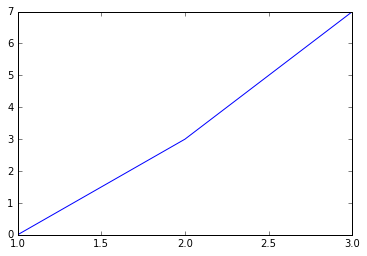

In [90]:
import matplotlib

matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [0, 3, 7])
plt.show()

In [91]:
import pandas as pd
import csv
import numpy as np
from math import sqrt
from sklearn.feature_extraction.text import CountVectorizer
countVector = CountVectorizer(min_df=1)
import re

In [92]:
# Gautam's video input
with open('./data/RAW_abhyudaya/final_gb1.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput = list(reader)

with open('./data/RAW_abhyudaya/final_gb4.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput2 = list(reader)
    
with open('./data/RAW_abhyudaya/final_gb6.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput3 = list(reader)
    
with open('./data/RAW_abhyudaya/final_gb7.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput4 = list(reader)

affectivavideooutput2.pop(0)
affectivavideooutput3.pop(0)
affectivavideooutput4.pop(0)

print len(affectivavideooutput)

affectivavideooutput.extend(affectivavideooutput2)
print len(affectivavideooutput)
affectivavideooutput.extend(affectivavideooutput3)
print len(affectivavideooutput)
affectivavideooutput.extend(affectivavideooutput4)

print len(affectivavideooutput)
print affectivavideooutput[0]


9467
11419
12972
14648
['', 'TimeStamp', 'interocularDistance', 'glasses', 'pitch', 'yaw', 'roll', 'joy', 'fear', 'disgust', 'sadness', 'anger', 'surprise', 'contempt', 'valence', 'engagement', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden', 'cheekRaise', 'lidTighten', 'dimpler', 'lipStretch', 'jawDrop', 'relaxed', 'smiley', 'laughing', 'kissing', 'disappointed', 'rage', 'smirk.1', 'wink', 'stuckOutTongueWinkingEye', 'stuckOutTongue', 'flushed', 'scream', 'FRUSTRATED', 'TIRED', 'ENGAGED', 'CLASS']


In [93]:
affectivavideooutput.pop(0)
affectivadataframe = pd.DataFrame(affectivavideooutput, 
                                columns = ['', 'TimeStamp', 'interocularDistance', 'glasses', 'pitch', 'yaw', 'roll', 'joy', 
                                           'fear', 'disgust', 'sadness', 'anger', 'surprise', 'contempt', 'valence', 
                                           'engagement', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 
                                           'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 
                                           'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden',
                                           'cheekRaise', 'lidTighten', 'dimpler', 'lipStretch', 'jawDrop', 'relaxed',
                                           'smiley', 'laughing', 'kissing', 'disappointed', 'rage', 'smirk.1', 'wink', 
                                           'stuckOutTongueWinkingEye', 'stuckOutTongue', 'flushed',
                                           'scream', 'frustrated', 'tired', 'engaged', 'class'])
affectivadataframe[0:10]
#drop the columns that are outright irrelevant for data analysis
affectivadataframe = affectivadataframe.drop(['','TimeStamp'],axis=1)
#affectivadataframe[-10:]
print len(affectivadataframe)

14647


In [94]:
import statsmodels.api as sm
X= affectivadataframe[['smile','innerBrowRaise','browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop','engaged','frustrated','tired']].copy()

for column in X.columns:
     X[column]=X[column].apply(lambda x:float(x.replace('"','').replace("\n",'').replace('nan','')))

X['engaged'] = X['engaged'].apply(lambda x:int(x))
X['frustrated'] = X['frustrated'].apply(lambda x:int(x))
X['tired'] = X['tired'].apply(lambda x:int(x))


In [95]:
import sklearn.utils
df = sklearn.utils.shuffle(X)
df = df.reset_index(drop=True)
df[0:10]


,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,attention,eyeWiden,cheekRaise,lidTighten,dimpler,lipStretch,jawDrop,engaged,frustrated,tired
0,0.0001,0.0017,0.3675,0.0005,0.2961,0.0301,0.0000,0.0036,0.0228,0.0010,...,68.7528,0.0005,0.0001,0.2042,0.0000,0.0005,36.6013,1,0,0
1,0.0000,0.3634,0.0438,0.0089,0.0068,0.0015,0.1021,0.0902,0.6553,0.0146,...,95.4916,0.0020,0.0038,0.1071,0.1469,0.0009,0.0091,0,0,0
2,0.0001,0.0753,0.0125,0.9525,0.1256,0.0081,0.0015,2.9799,1.2893,1.3095,...,98.2015,0.0001,0.0133,0.3133,0.6056,0.0117,0.1503,1,1,0
3,0.0002,0.0105,0.0106,0.0058,0.0116,0.0020,0.0064,0.4691,8.5714,0.6517,...,97.5603,0.0005,0.0016,0.0483,0.2395,0.0874,0.4730,1,1,0
4,0.0000,0.0088,0.8570,0.3820,1.0644,2.8577,5.7884,0.0532,0.0826,0.0096,...,93.0457,0.0024,0.0000,0.1442,0.6053,0.0143,0.0056,1,0,0
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,97.3836,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,0
6,0.0000,0.0087,0.1313,0.0037,0.0394,0.0192,0.0003,0.0017,0.0068,0.0050,...,64.9050,0.0008,0.0010,0.1322,0.0007,0.0005,0.9447,1,0,0
7,0.0000,0.0024,0.2030,0.1007,0.0020,0.0428,3.5119,0.0544,0.5347,0.2020,...,61.6071,0.3619,0.0313,0.0785,0.4228,0.0010,2.7955,1,0,0
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,96.6665,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,0
9,0.0000,0.0004,0.7481,0.0000,0.0005,0.0000,9.5452,0.0007,0.0006,0.0000,...,84.1457,0.0306,0.0001,0.0001,0.0000,0.0000,1.8366,1,0,0


In [96]:
df[14500:
  ]

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,attention,eyeWiden,cheekRaise,lidTighten,dimpler,lipStretch,jawDrop,engaged,frustrated,tired
14500,0.0000,0.0008,0.0165,0.0172,0.0609,0.0071,0.0018,0.0022,0.0584,1.0803,...,91.8243,0.0001,0.1126,0.0542,0.0586,0.0014,3.1013,0,0,0
14501,0.0001,0.0045,0.6340,0.0000,0.0599,0.0001,0.0052,0.0001,0.0028,0.0090,...,98.0259,0.0009,0.0037,0.0035,0.0085,2.6910,0.1792,1,0,1
14502,0.0000,27.5634,0.0024,20.2224,0.0604,0.0012,0.0179,0.0002,0.0012,0.0009,...,98.1393,0.0000,0.0023,33.6673,0.0000,0.0006,48.4190,1,1,0
14503,0.0000,0.0387,0.0093,0.0113,0.0857,0.0004,0.0282,0.0015,3.5178,0.1063,...,94.4079,0.0000,0.0004,0.0934,0.0311,0.0047,0.3625,1,0,0
14504,0.0000,1.0462,0.0048,0.0094,0.1233,0.0001,0.1123,0.0050,0.6011,0.0769,...,96.3621,0.0000,0.0038,1.0997,0.0024,0.0002,0.1041,1,0,1
14505,0.0007,0.0003,26.0187,0.0026,23.0512,1.4254,0.0000,27.6334,0.0049,0.0239,...,69.7431,0.0001,0.2205,2.8727,0.0015,0.0029,52.4628,1,0,0
14506,0.0000,0.0649,0.0214,0.0016,0.0128,0.0000,0.0184,0.0011,0.4892,1.1604,...,92.8589,0.0000,0.0030,0.0740,0.1122,0.0103,0.0701,1,0,0
14507,0.0000,0.0031,0.0397,0.0006,0.0654,21.5068,0.0208,0.0210,0.3716,0.0078,...,94.5310,0.0011,0.0006,0.0042,0.0032,0.0005,0.5236,1,0,0
14508,0.0000,0.0012,2.1497,0.0198,0.0005,0.0010,1.8910,2.7396,75.7016,7.1904,...,60.9362,28.6035,0.1222,0.0189,0.1512,0.0142,10.5682,1,0,0
14509,0.0001,0.3074,0.2672,0.0002,0.0000,0.0000,0.0009,0.0582,0.0227,0.1250,...,93.7928,1.1748,0.0001,0.0009,0.0757,0.0184,0.0131,0,1,1


In [97]:
dftrain = df[0:13182]
dftest = df[13184:14646]
print len(dftrain)

13182


In [98]:
from sklearn.preprocessing import StandardScaler
explanatoryStd = dftrain[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']].copy() 
X_std = StandardScaler().fit_transform(explanatoryStd)
backtodf = pd.DataFrame(X_std, index=explanatoryStd.index, columns=explanatoryStd.columns)
Dependent = dftrain['frustrated']
logit = sm.Logit(Dependent,backtodf)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.559984
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             frustrated   No. Observations:                13182
Model:                          Logit   Df Residuals:                    13162
Method:                           MLE   Df Model:                           19
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                 -0.4850
Time:                        08:34:14   Log-Likelihood:                -7381.7
converged:                       True   LL-Null:                       -4971.0
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
smile                  0.0212      0.021      0.993      0.321        -0.021     0.063
inner

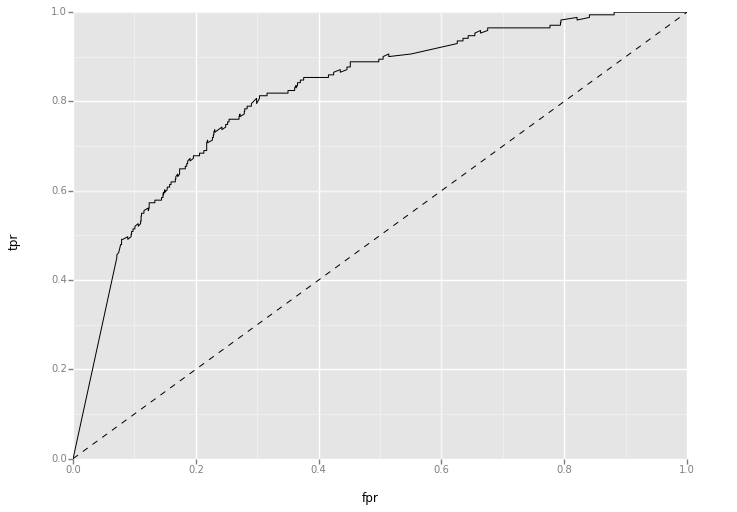

<ggplot: (322371461)>

In [99]:

from sklearn import metrics
from math import sqrt 
from ggplot import *
count1 = 0
count0 = 0
count = 0
sum1 = 0.0
#dftest_std = StandardScaler().fit_transform(X_std = StandardScaler().fit_transform(explanatoryStd))
per = result.predict(dftest[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']] )

fpr, tpr, pr = metrics.roc_curve(dftest['frustrated'], per)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

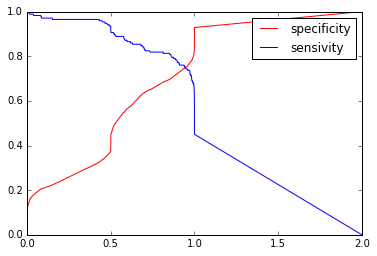

In [100]:
from numpy import *
import math
import matplotlib.pyplot as plt
#print 1-fpr
plt.plot(pr,1-fpr,'r',label= 'specificity')
plt.plot(pr,tpr,'b',label= 'sensivity')
plt.legend()

In [101]:
auc = metrics.auc(fpr,tpr)
print auc

0.816643338271


In [102]:
for i in pr:
    if i > 1:
        print i

1.99999996883


In [103]:
from sklearn.preprocessing import StandardScaler
explanatoryStd = dftrain[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']].copy() 
X_std = StandardScaler().fit_transform(explanatoryStd)
backtodf = pd.DataFrame(X_std, index=explanatoryStd.index, columns=explanatoryStd.columns)
Dependent = dftrain['engaged']
logit = sm.Logit(Dependent,backtodf)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.667587
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                engaged   No. Observations:                13182
Model:                          Logit   Df Residuals:                    13162
Method:                           MLE   Df Model:                           19
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                 -0.4559
Time:                        08:34:29   Log-Likelihood:                -8800.1
converged:                       True   LL-Null:                       -6044.3
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
smile                  0.0164      0.022      0.744      0.457        -0.027     0.060
inner

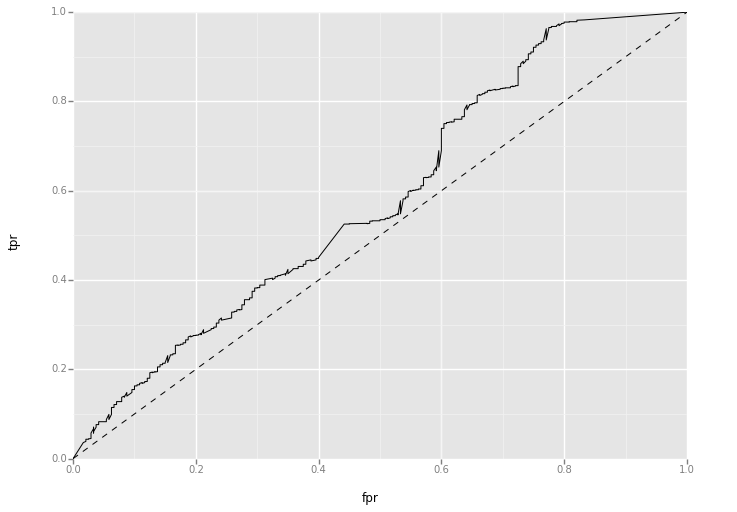

<ggplot: (322371465)>

In [104]:
from sklearn import metrics
from math import sqrt 
from ggplot import *
count1 = 0
count0 = 0
count = 0
sum1 = 0.0

per = result.predict(dftest[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']] )

fpr, tpr, pr = metrics.roc_curve(dftest['engaged'], per)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

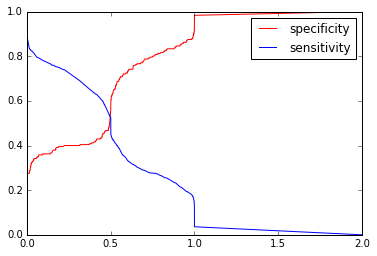

In [105]:
from numpy import *
import math
import matplotlib.pyplot as plt
#print 1-fpr
plt.plot(pr,1-fpr,'r',label= 'specificity')
plt.plot(pr,tpr,'b',label= 'sensitivity')
plt.legend()

In [77]:
from sklearn.preprocessing import StandardScaler
explanatoryStd = dftrain[['innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']].copy() 
X_std = StandardScaler().fit_transform(explanatoryStd)
backtodf = pd.DataFrame(X_std, index=explanatoryStd.index, columns=explanatoryStd.columns)
Dependent = dftrain['tired']
logit = sm.Logit(Dependent,backtodf)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.684854
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  tired   No. Observations:                13182
Model:                          Logit   Df Residuals:                    13163
Method:                           MLE   Df Model:                           18
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                  -2.530
Time:                        08:29:11   Log-Likelihood:                -9027.7
converged:                       True   LL-Null:                       -2557.3
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
innerBrowRaise         0.0983      0.020      4.957      0.000         0.059     0.137
browR

In [106]:
auc = metrics.auc(fpr,tpr)
print auc

0.58232405892


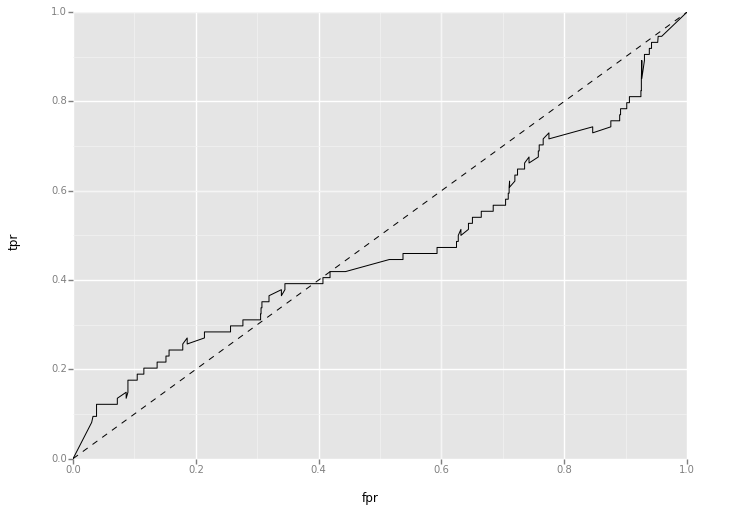

<ggplot: (319607045)>

In [107]:
from sklearn import metrics
from math import sqrt 
from ggplot import *
count1 = 0
count0 = 0
count = 0
sum1 = 0.0

per = result.predict(dftest[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']] )

fpr, tpr, pr = metrics.roc_curve(dftest['tired'], per)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [108]:
auc = metrics.auc(fpr,tpr)
print auc

0.472359607446
